Notebook to investigate the spin texture of WSM-metal systems

In [527]:
import weyl_spins as ws
import weyl_green as wg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [522]:
size=100
ks,es,vs=ws.Spectrum(size=size,kz=0,t=1,g=0,mu=-4,r=1.7,bulk=1)

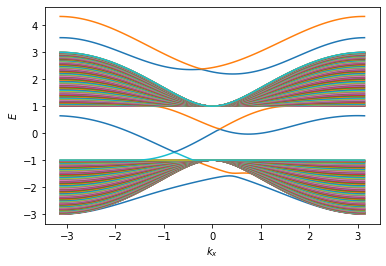

In [523]:
plt.plot(ks,es)
plt.xlabel(r"$k_x$")
plt.ylabel(r"$E$")
plt.show()

Plot wrt $k_z$:

In [421]:
size=100
ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=0,t=1,g=0,mu=-4,r=2.3,bulk=1)

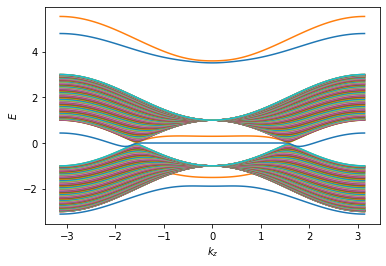

In [422]:
plt.plot(ks_z,es_z)
plt.xlabel(r"$k_z$")
plt.ylabel(r"$E$")
# plt.xlim(-2,2)
# plt.ylim(-1,1)
plt.show()

In [300]:
size=100

kxs = np.linspace(-0.5,0.5,5)
es_5 = np.zeros((100,202,5))

for i in range(5):
    kx = kxs[i]
    ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=kx,t=1,g=0,mu=-4,r=2.3,bulk=1)
    es_5[:,:,i] = es_z

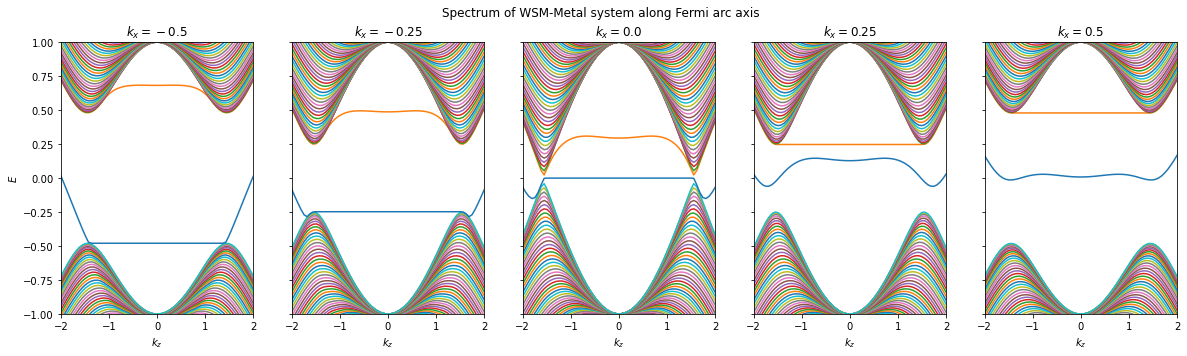

In [308]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system along Fermi arc axis")

for i in range(5):
    ax[i].plot(ks_z,es_5[:,:,i])
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1,1)
    ax[i].set_xlabel(r"$k_z$")
    ax[i].set_title(r"$k_x = {}$".format(kxs[i]))
ax[0].set_ylabel(r"$E$")

plt.show()

In [261]:
bdry_idx = np.argmin(np.abs(es_z[50,:]-0.5))
es_z[50,bdry_idx]
state = vs_z[:,bdry_idx,50]

From our work with spectral functions, we know that the fledgling states are localized to the edges:

In [524]:
# get index of state with energy closest to 0 at kx = -pi
bdry_idx = np.argmin(np.abs(es[0,:]))
# get state
state = vs[:,bdry_idx,0]

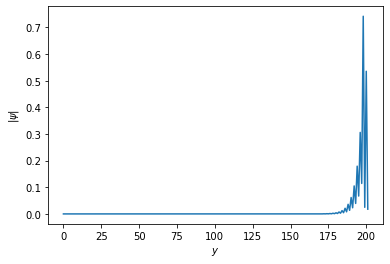

In [525]:
plt.plot(np.arange(2*size+2),np.abs(state))
plt.xlabel(r"$y$")
plt.ylabel(r"$|\psi|$")
plt.show()

From the left:

In [529]:
spinX,spinY,spinZ=ws.Spin(state,size)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=(0.050751392265138605+0j)
<sigma_y>=0j
<sigma_z>=(0.9582948150085531+0j)


From the right:

In [255]:
# get index of state with energy closest to 0 at kx = -pi
bdry_idx = np.argmin(np.abs(es[-1,:]))
# get state
state = vs[:,bdry_idx,-1]

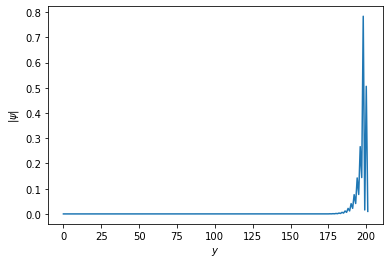

In [257]:
plt.plot(np.arange(2*size+2),np.abs(state))
plt.xlabel(r"$y$")
plt.ylabel(r"$|\psi|$")
plt.show()

In [258]:
spinX,spinY,spinZ=Spin(state)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=(0.07304643352566909+0j)
<sigma_y>=0j
<sigma_z>=(0.9410627735529455+0j)


Near the middle:

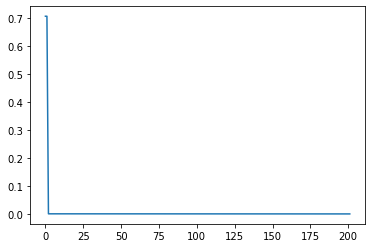

In [254]:
k=50
# get index of state with energy closest to 0 at kx = -pi
bdry_idx = np.argmin(np.abs(es[k,:]))
# get state
state = vs[:,100,k]
# plot it
plt.plot(np.arange(2*size+2),np.abs(state))
plt.show()

In [223]:
spinX,spinY,spinZ=Spin(state)
print("<sigma_x>={}".format(spinX))
print("<sigma_y>={}".format(spinY))
print("<sigma_z>={}".format(spinZ))

<sigma_x>=(0.9999999999999994+0j)
<sigma_y>=0j
<sigma_z>=(5.551115123125783e-16+0j)


Look at the $k_x,k_z$ dependency as we sweep the first Brillouin zone. It seems like $\sigma_y=0$ always, so focus on the interplay between $\sigma_x$ and $\sigma_z$. First, a simple colormap of $<\sigma_x>$:

In [156]:
def SpinMap(size,res,t,g,mu,r):
    """
    Colormap of <sigma_x> in kx,kz space
    """
    SigmaX = np.kron(np.eye(size+1),ws.Pauli(1))
    SigmaY = np.kron(np.eye(size+1),ws.Pauli(2))
    SigmaZ = np.kron(np.eye(size+1),ws.Pauli(3))

    kxs = np.linspace(-np.pi,np.pi,num=res)
    kzs = np.linspace(-np.pi,np.pi,num=res)
    SX = np.zeros((res,res),dtype=float)
    SY = np.zeros((res,res),dtype=float)
    SZ = np.zeros((res,res),dtype=float)
    
    for i in range(res):
        kz = kzs[i]
        for j in range(res):
            kx = kxs[j]
            H = ws.FullHamiltonianBis(size=size,kx=kx,kz=kz,t=t,g=g,mu=mu,r=r)
            E, V = np.linalg.eigh(H)
            # index of energy closest to 0
            bdry_idx = np.argmin(np.abs(E))
            # get state
            state = V[:,bdry_idx]
            # compute sigmax
            spinX = np.dot(state.conj().T,np.dot(SigmaX,state))
            spinY = np.dot(state.conj().T,np.dot(SigmaY,state))
            spinZ = np.dot(state.conj().T,np.dot(SigmaZ,state))

            SX[i,j] = spinX
            SY[i,j] = spinY
            SZ[i,j] = spinZ

    return SX, SY, SZ

In [169]:
SX,SY,SZ=SpinMap(size=20,res=100,t=1,g=0,mu=-2.5,r=0)

<ipython-input-156-105a0ed41bce>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  SX[i,j] = spinX
<ipython-input-156-105a0ed41bce>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  SY[i,j] = spinY
<ipython-input-156-105a0ed41bce>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  SZ[i,j] = spinZ


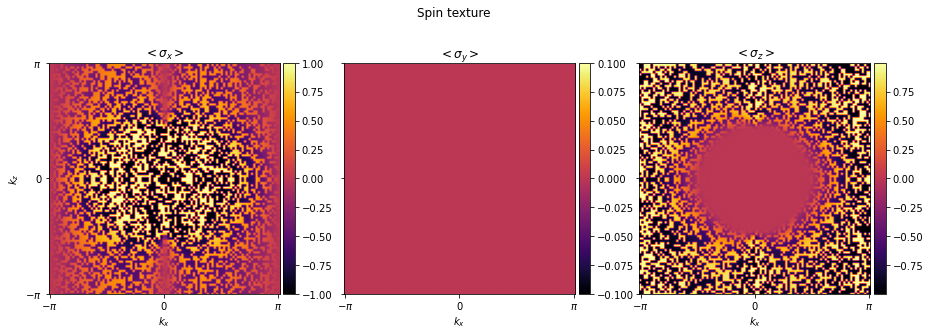

In [170]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))

plt.suptitle("Spin texture")

im0 = ax[0].imshow(SX,cmap='inferno')
ax[0].set_title(r"$<\sigma_x>$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(SY,cmap='inferno')
ax[1].set_title(r"$<\sigma_y>$")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(SZ,cmap='inferno')
ax[2].set_title(r"$<\sigma_z>$")

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

for i in range(3):
    ax[i].set_ylim(0,res)
    ax[i].set_yticks([0,int(res/2),res])
    ax[i].set_yticklabels(["$-\pi$","0","$\pi$"])
    ax[i].set_xticks([0,int(res/2)-1/2,res-1])
    ax[i].set_xticklabels(["$-\pi$","0","$\pi$"])
    ax[i].set_xlabel(r"$k_x$")

plt.show()

How does this match up to where the topological regions are?

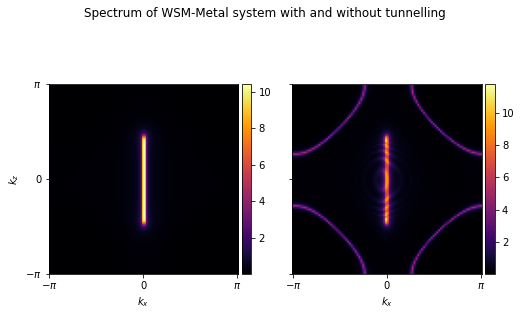

In [153]:
size=30
res=100

As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-np.pi,np.pi,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,r=0,spin=0)
    As_23[:,i] = wg.SpectralFunctionWeylKK(size=size,res=res,kx=kx,w=0,t=1,g=0,mu=-2,r=2.3,spin=0)
    
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels(["$-\pi$","0","$\pi$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$k_z$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels(["$-\pi$","0","$\pi$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

Turn tunnelling on

In [141]:
SX,SY,SZ=SpinMap(size=100,res=100,t=1,g=0,mu=0,r=2.3)

<ipython-input-130-366af1a96fe2>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  SX[i,j] = spinX
<ipython-input-130-366af1a96fe2>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  SY[i,j] = spinY
<ipython-input-130-366af1a96fe2>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  SZ[i,j] = spinZ


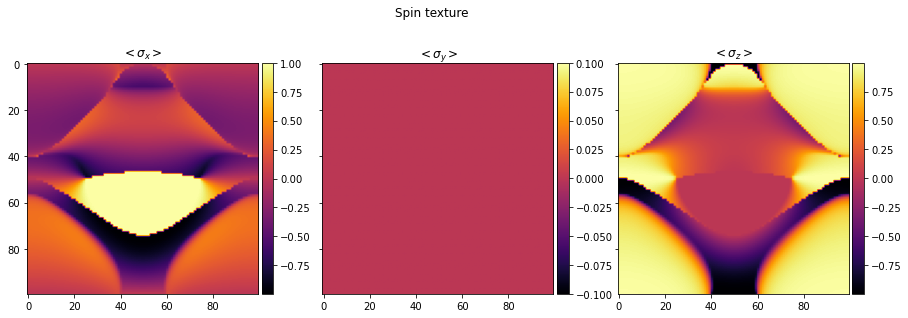

In [142]:
fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))

plt.suptitle("Spin texture")

im0 = ax[0].imshow(SX,cmap='inferno')
ax[0].set_title(r"$<\sigma_x>$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(SY,cmap='inferno')
ax[1].set_title(r"$<\sigma_y>$")

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[2].imshow(SZ,cmap='inferno')
ax[2].set_title(r"$<\sigma_z>$")

divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.show()

Now, look at the spatial dependency in $y$:

In [177]:
def SpinRealSpace(state):
    """
    Colormap of <sigma_x> in kx,kz space
    """
    size = int(np.size(state)/2)
    SigmaX = ws.Pauli(1)
    SigmaY = ws.Pauli(2)
    SigmaZ = ws.Pauli(3)

    SX = np.zeros((size),dtype=float)
    SY = np.zeros((size),dtype=float)
    SZ = np.zeros((size),dtype=float)
    

    for i in range(size):
        state_y = state[2*i:2*(i+1)]
        # compute sigmas
        spinX = np.dot(state_y.conj().T,np.dot(SigmaX,state_y))
        spinY = np.dot(state_y.conj().T,np.dot(SigmaY,state_y))
        spinZ = np.dot(state_y.conj().T,np.dot(SigmaZ,state_y))
        SX[i] = spinX
        SY[i] = spinY
        SZ[i] = spinZ

    return SX, SY, SZ

In [178]:
SX, SY, SZ = SpinRealSpace(state=state)

<ipython-input-177-9985fdf5126c>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  SX[i] = spinX
<ipython-input-177-9985fdf5126c>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  SY[i] = spinY
<ipython-input-177-9985fdf5126c>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  SZ[i] = spinZ


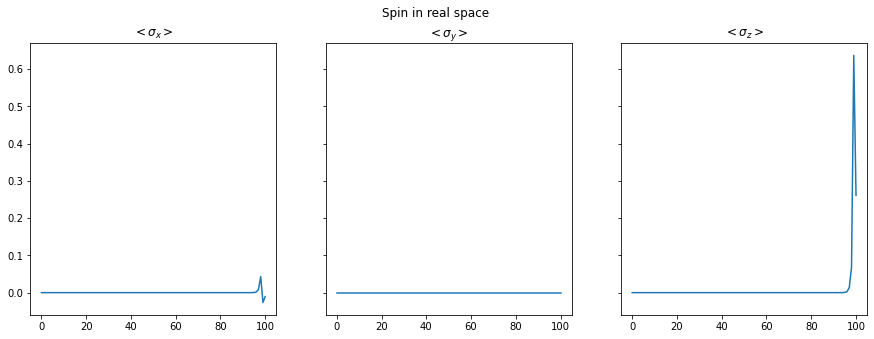

In [183]:
ys = np.arange(101)

fig,ax=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(15,5))

plt.suptitle("Spin in real space")

im0 = ax[0].plot(ys,SX)
ax[0].set_title(r"$<\sigma_x>$")

im1 = ax[1].plot(ys,SY)
ax[1].set_title(r"$<\sigma_y>$")

im2 = ax[2].plot(ys,SZ)
ax[2].set_title(r"$<\sigma_z>$")


plt.show()

I'm not sure how valid this is, since there are points where $<\sigma_x> + <\sigma_y> + <\sigma_z> = 0$. But, this is just due to the fact that $\psi$ has vanishing amplitude at these points.

Look at how the spin $\sigma_x$ and $\sigma_z$ of the the boundary state varies as a function of tunnelling strength.

We'll look at the state at $k_x=k_z=0$. First, this is how the spectrum changes as a function of $r$:

In [429]:
size=100

rs = np.linspace(0,2.3,5)
es_5 = np.zeros((100,202,5))
vs_5 = np.zeros((202,202,100,5),dtype=complex)

for i in range(5):
    r = rs[i]
    ks_z,es_z,vs_z=ws.SpectrumZ(size=size,kx=0,t=1,g=0,mu=-4,r=r,bulk=1)
    vs_5[:,:,:,i] = vs_z
    es_5[:,:,i] = es_z

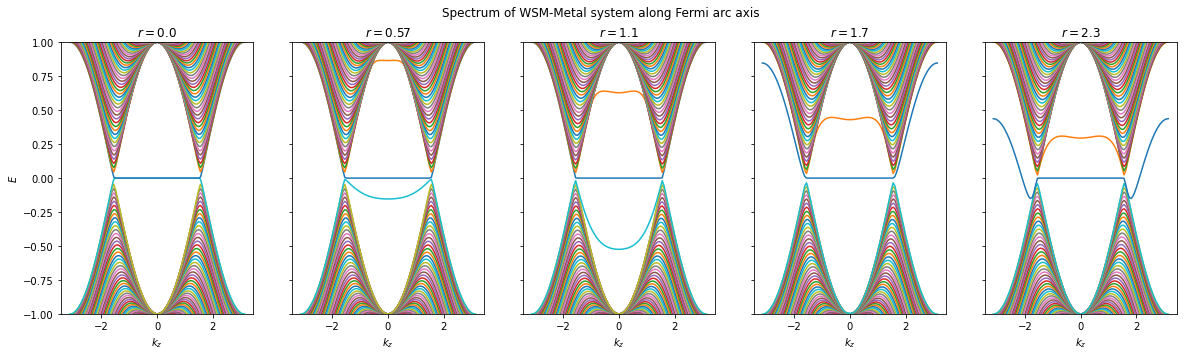

In [455]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Spectrum of WSM-Metal system along Fermi arc axis")

for i in range(5):
    ax[i].plot(ks_z,es_5[:,:,i])
#     ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-1,1)
    ax[i].set_xlabel(r"$k_z$")
    ax[i].set_title(r"$r = {:.2}$".format(rs[i]))
ax[0].set_ylabel(r"$E$")

plt.show()

Look at the state at $E=0$ (`np.argmin(np.abs(es))`), which we expect it not to change with $r$:

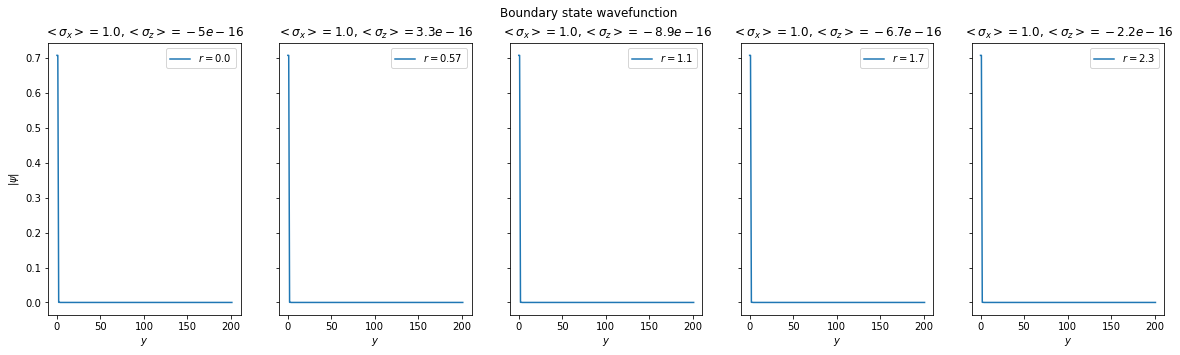

In [431]:
fig,ax=plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(20,5))

plt.suptitle("Boundary state wavefunction")

for i in range(5):
    bdry_idx = np.argmin(np.abs(es_5[50,:,i]))
    if i==0:
        bdry_idx+=1 # to get correct localization
        ax[i].set_ylabel(r"$|\psi|$")
    state = vs_5[:,bdry_idx,50,i]
    spinX,spinY,spinZ=Spin(state) # get spin
    ax[i].set_title(r"$ <\sigma_x>={:.2},  <\sigma_z>={:.2}$".format(np.real(spinX),np.real(spinZ)))
    ax[i].plot(np.arange(2*size+2),np.abs(state),label=r"$r={:.2}$".format(rs[i]))
    ax[i].set_xlabel(r"$y$")
    ax[i].legend()
plt.show()

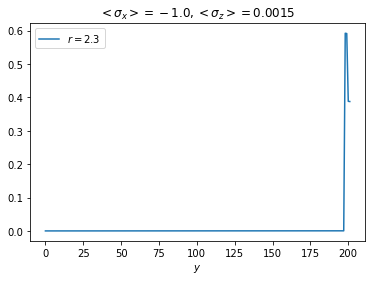

In [467]:
k=1
i=4
e=-0.98
bdry_idx = np.argmin(np.abs(es_5[50,:,i]-e))
state = vs_5[:,k,50,i]
spinX,spinY,spinZ=Spin(state) # get spin
plt.title(r"$ <\sigma_x>={:.2},  <\sigma_z>={:.2}$".format(np.real(spinX),np.real(spinZ)))
plt.plot(np.arange(2*size+2),np.abs(state),label=r"$r={:.2}$".format(rs[i]))
plt.xlabel(r"$y$")
plt.legend()
plt.show()